1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

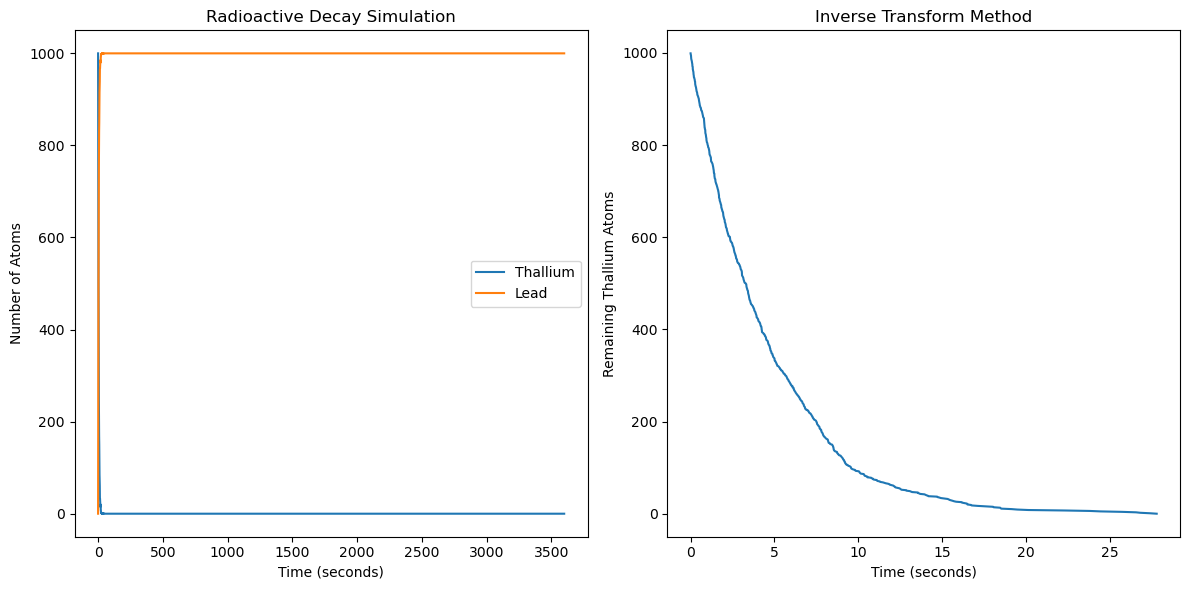

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_decay_simulation(tau, num_atoms):
    time_steps = np.arange(0, 3600, 1)  # 1 second time steps for 1 hour (3600 seconds)
    tl_atoms = np.ones((len(time_steps), num_atoms))  # Initial Thallium atoms
    pb_atoms = np.zeros((len(time_steps), num_atoms))  # Initial Lead atoms

    for i, t in enumerate(time_steps):
        probabilities = 1 - 2**(-t/tau)
        decayed_atoms = np.random.rand(num_atoms) < probabilities
        tl_atoms[i, :] -= decayed_atoms
        pb_atoms[i, :] += decayed_atoms

    return time_steps, tl_atoms.sum(axis=1), pb_atoms.sum(axis=1)

def inverse_transform_method(tau, num_atoms):
    random_numbers = np.random.rand(num_atoms)
    decay_times = -tau * np.log2(1 - random_numbers)

    time_steps = np.sort(decay_times)
    remaining_atoms = num_atoms - np.arange(1, num_atoms + 1)

    return time_steps, remaining_atoms

# Simulation parameters
tau_value = 3.052  # half-life in minutes
num_atoms_value = 1000

# Perform simulations
time_steps_sim, tl_atoms_sim, pb_atoms_sim = radioactive_decay_simulation(tau_value, num_atoms_value)
time_steps_inverse, remaining_atoms_inverse = inverse_transform_method(tau_value, num_atoms_value)

# Plotting
plt.figure(figsize=(12, 6))

# Radioactive decay simulation plot
plt.subplot(1, 2, 1)
plt.plot(time_steps_sim, tl_atoms_sim, label='Thallium')
plt.plot(time_steps_sim, pb_atoms_sim, label='Lead')
plt.title('Radioactive Decay Simulation')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.legend()

# Inverse transform method plot
plt.subplot(1, 2, 2)
plt.plot(time_steps_inverse, remaining_atoms_inverse)
plt.title('Inverse Transform Method')
plt.xlabel('Time (seconds)')
plt.ylabel('Remaining Thallium Atoms')

plt.tight_layout()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

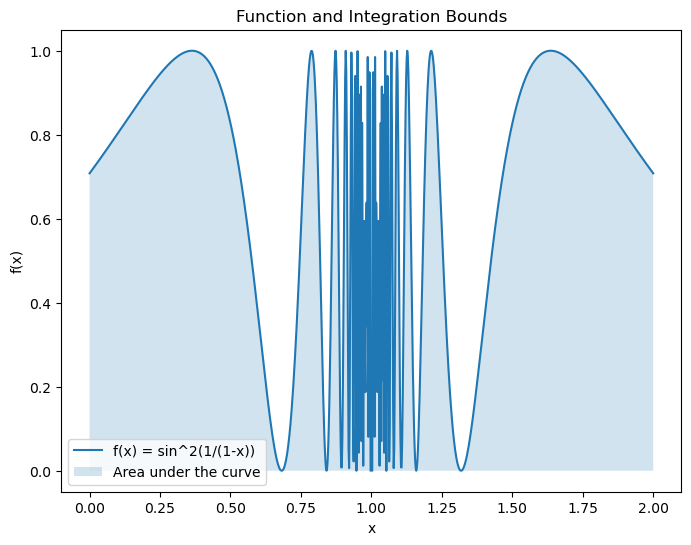

Hit/Miss Method:
Mean Estimate: 1.3475199999999998
Standard Deviation (rescaled): 0.0023595103070105277

Mean Value Method:
Mean Estimate: 1.345457415939365
Standard Deviation (rescaled): 0.0018218147278949348


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(1/(1-x))**2

# Define the integration bounds
a, b = 0, 2

# Plot the function
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f(x) = sin^2(1/(1-x))')
plt.fill_between(x_vals, y_vals, alpha=0.2, label='Area under the curve')
plt.title('Function and Integration Bounds')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Hit/Miss Monte Carlo Integration
def hit_miss_integration(N):
    random_x = np.random.uniform(a, b, N)
    random_y = np.random.uniform(0, 1, N)
    
    integrals = (random_y < f(random_x)).sum()
    integral_estimate = integrals / N * (b - a)
    
    return integral_estimate

# Mean Value Monte Carlo Integration
def mean_value_integration(N):
    random_x = np.random.uniform(a, b, N)
    function_values = f(random_x)
    
    integral_estimate = np.mean(function_values) * (b - a)
    
    return integral_estimate

# Perform Monte Carlo integration with both methods
N = 10000  # number of random points

hit_miss_estimates = [hit_miss_integration(N) for _ in range(10)]
mean_value_estimates = [mean_value_integration(N) for _ in range(10)]

# Calculate mean and standard deviation for both methods
hit_miss_mean = np.mean(hit_miss_estimates)
hit_miss_std = np.std(hit_miss_estimates, ddof=1) / np.sqrt(len(hit_miss_estimates))

mean_value_mean = np.mean(mean_value_estimates)
mean_value_std = np.std(mean_value_estimates, ddof=1) / np.sqrt(len(mean_value_estimates))

print("Hit/Miss Method:")
print("Mean Estimate:", hit_miss_mean)
print("Standard Deviation (rescaled):", hit_miss_std)

print("\nMean Value Method:")
print("Mean Estimate:", mean_value_mean)
print("Standard Deviation (rescaled):", mean_value_std)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if a point is inside the unit circle
def inside_circle(x, y):
    return x**2 + y**2 <= 1

# Function to perform Monte Carlo integration for the unit circle
def monte_carlo_circle_area(N):
    random_points = np.random.rand(2, N) * 2 - 1  # Generate random points in the square [-1, 1] x [-1, 1]
    
    inside_points = np.sum(inside_circle(random_points[0], random_points[1]))
    
    area_estimate = inside_points / N * 4  # Multiply by 4 to account for the full area of the unit circle
    
    return area_estimate

# Function to perform Monte Carlo integration for a 10D sphere
def monte_carlo_nd_sphere_volume(N, dimensions):
    random_points = np.random.rand(dimensions, N) * 2 - 1  # Generate random points in the hypercube [-1, 1]^n
    
    inside_points = np.sum(np.sum(random_points**2, axis=0) <= 1)
    
    volume_estimate = inside_points / N * 2**dimensions  # Multiply by 2^dimensions to account for the full volume of the n-dimensional sphere
    
    return volume_estimate

# Perform Monte Carlo integration for the unit circle
N_circle = 100000
circle_area_estimate = monte_carlo_circle_area(N_circle)

print("Estimated area of the unit circle:", circle_area_estimate)

# Perform Monte Carlo integration for a 10D sphere
N_10D_sphere = 100000
dimensions_10D_sphere = 10
nd_sphere_volume_estimate = monte_carlo_nd_sphere_volume(N_10D_sphere, dimensions_10D_sphere)

print("\nEstimated volume of the 10D sphere:", nd_sphere_volume_estimate)


Estimated area of the unit circle: 3.14136

Estimated volume of the 10D sphere: 2.60096


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
import numpy as np

# Define the integrand function
def integrand(x):
    return x**(-0.5) / (np.exp(x) + 1)

# Define the weighting function
def weight_function(x):
    return 1 / np.sqrt(x)

# Define the integral using importance sampling
def importance_sampling_integral(N):
    # Generate random points according to the weight function
    random_points = np.random.rand(N)**2
    
    # Calculate the integrand values at the random points
    integrand_values = integrand(random_points) / weight_function(random_points)
    
    # Estimate the integral
    integral_estimate = np.mean(integrand_values) * 2  # Multiply by 2 to account for the change of variables (w(x) = 1/sqrt(x))
    
    return integral_estimate

# Perform importance sampling integration
N = 100000
result = importance_sampling_integral(N)

print("Estimated value of the integral:", result)


Estimated value of the integral: 0.8397515474948708
